<div style="background-color: lightgreen; padding: 18px;">
    <h1> Aula 7| Estatística I
</div>

<div style="background-color: lightblue; padding: 10px;">
    <h2> Tópicos da aula 7
</div>

- Exercícios variados

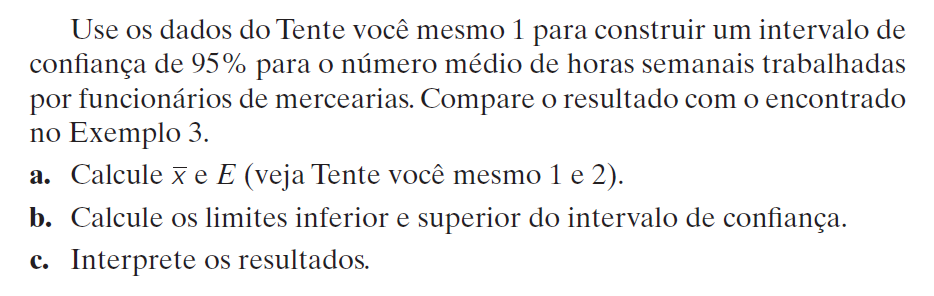

In [10]:
dados = [26, 25, 32, 31, 28, 28, 28, 22, 28, 25, 21, 40, 32, 22, 25, 22, 26, 24, 46, 20, 35, 22, 32, 48, 32, 36, 38, 32, 22, 19]
dados2 = [int(elem) for elem in "26 25 32 31 28 28 28 22 28 25 21 40 32 22 25 22 26 24 46 20 35 22 32 48 32 36 38 32 22 19".split(' ')]


desvio padrão --> $\sigma$  
erro padrão --> $\sigma_{x} =  \frac{\sigma}{\sqrt(n)} $  
margem de erro --> $E = z_{c}\frac{\sigma}{\sqrt(n)} $  
Intervalo de confiança --> $[\bar{x} - E, \bar{x} + E]$

In [8]:
from scipy.stats import norm
from scipy.stats import t
import numpy as np
from math import sqrt

In [35]:
# André Filipe
tam = len(dados2)
dados2 = np.array(dados2)
media = dados2.mean()
desvpad = (tam/(tam-1))*(dados2.std())
alpha = 0.05
zc = norm.isf(alpha / 2)
E = zc * (desvpad / sqrt(len(dados2)))

print(media)
print(round(E,2))
print(f'IC --> {media - E:.3f} <= \u03BC <= {media + E:.3f}')
print(f'IC =[{media - E:.3f}, {media + E:.3f}]')

28.9
2.68
IC --> 26.221 <= μ <= 31.579
IC =[26.221, 31.579]


In [ ]:
import scipy.stats as st 
from math import sqrt

amostra = [26, 25, 32, 31, 28, 28, 28, 22, 28, 25, 21, 40, 32, 22, 25, 22, 26, 24, 46, 20, 35, 22, 32, 48, 32, 36, 38, 32, 22, 19]
resultado = st.t.interval(confidence=0.95, df=len(amostra)-1, 
              loc=np.mean(amostra), 
              scale=st.sem(amostra))

resultado2 = st.norm.interval(confidence=0.95, 
              loc=np.mean(amostra), 
              scale=st.sem(amostra))#tstd(amostra)/sqrt(len(amostra)))

[round(elem,3) for elem in resultado], [round(elem, 3) for elem in resultado2]

In [44]:
[round(elem,3) for elem in resultado], [round(elem, 3) for elem in resultado2]

([26.152, 31.648], [26.266, 31.534])

A empresa **Suco Bom** produz **sucos de frutas em embalagens de 500 ml**. Seu processo de produção é quase todo automatizado e as embalagens de sucos são preenchidas por uma máquina que às vezes apresenta um certo desajuste, levando a erros no preenchimento das embalagens para mais ou menos conteúdo. Quando o volume médio cai abaixo de 500 ml, a empresa se preocupa em perder vendas e ter problemas com os orgãos fiscalizadores. Quando o volume passa de 500 ml, a empresa começa a se preocupar com prejuízos no processo de produção.

O setor de controle de qualidade da empresa **Suco Bom** extrai, periodicamente, **amostras de 50 embalagens** para monitorar o processo de produção. Para cada amostra, é realizado um **teste de hipóteses** para avaliar se o maquinário se desajustou. A equipe de controle de qualidade assume um **nível de significância de 5%**.

Suponha agora que uma **amostra de 50 embalagens** foi selecionada e que a **média amostral observada foi de 503,24 ml**. **Esse valor de média amostral é suficientemente maior que 500 ml para nos fazer rejeitar a hipótese de que a média do processo é de 500 ml ao nível de significância de 5%, com desvio padrão populacional de 4,4?**

In [2]:
amostra = [509, 505, 495, 510, 496, 509, 497, 502, 503, 505, 
           501, 505, 510, 505, 504, 497, 506, 506, 508, 505, 
           497, 504, 500, 498, 506, 496, 508, 497, 503, 501, 
           503, 506, 499, 498, 509, 507, 503, 499, 509, 495, 
           502, 505, 504, 509, 508, 501, 505, 497, 508, 507]

In [ ]:
Ho : mu = 500 
H1 : mu <> 500

In [40]:
from scipy.stats import norm
from scipy.stats import t
import numpy as np

mu = 500
sigma = 4.49 #np.array(amostra).std()
alpha = 0.05
n = 50

media = sum(amostra) / len(amostra)
erro_padrao = sigma / n**0.5

# É bicaudal? Sim (Ho --> =)
# Uso Zc ou Tc? Zc, pois n>=30

zc = norm.isf(alpha / 2)

f'Não rejeição: {-zc:.2f} <= z <= {zc:.2f} '

# Estatística do teste
z = (media - mu) / erro_padrao

print(f'Estatística do teste: {z}')
if zc < abs(z):
    print('Rejeita a hipótese nula')
else:
    print('Não rejeita a hipótese nula')


# p-valor
p_valor = 2 * norm.sf(z)
print(f'p-valor: {p_valor}')

if p_valor < alpha:
    print('Rejeita a hipótese nula')
else:
    print('Não rejeita a hipótese nula')
  

Estatística do teste: 5.1025077306111815
Rejeita a hipótese nula
p-valor: 3.351820505348387e-07
Rejeita a hipótese nula


In [35]:
zc < abs(z), sigma * 50/49

(True, 4.529325060761167)

In [19]:
norm.sf(z)

9.602254205349944e-08

In [33]:
from statsmodels.stats.weightstats import ztest
from scipy.stats import ttest_1samp

ztest(x1=amostra, value=500), ttest_1samp(amostra, popmean=500)

((5.109559775991873, 3.229103172445771e-07),
 TtestResult(statistic=5.109559775991873, pvalue=5.307173320745504e-06, df=49))